<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/praktikum06/notebook/Tugas06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/MyDrive/praktikum-ml/Praktikum06/data'

In [6]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv(path + '/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
df.duplicated().sum()

np.int64(33)

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [10]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [11]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
df['Purchased'].unique()

array([0, 1])

In [13]:
df['Purchased'].value_counts()

,count
Purchased,
0,229
1,138


In [14]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [15]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [16]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [40]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

num_cols = ['Age', 'EstimatedSalary']  # daftar kolom numeric
cat_cols = []  # daftar kolom kategori

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipe = Pipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(class_weight='balanced'))
])

param_grid = {
    'svc__C':[0.1,1,10],
    'svc__gamma':[0.001,0.01,0.1]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)

Best params: {'svc__C': 10, 'svc__gamma': 0.1}


In [41]:
y_pred = model.predict(X_test)

print(f"Akurasi:  {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi:  71.62%

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        46
           1       0.73      0.39      0.51        28

    accuracy                           0.72        74
   macro avg       0.72      0.65      0.66        74
weighted avg       0.72      0.72      0.69        74



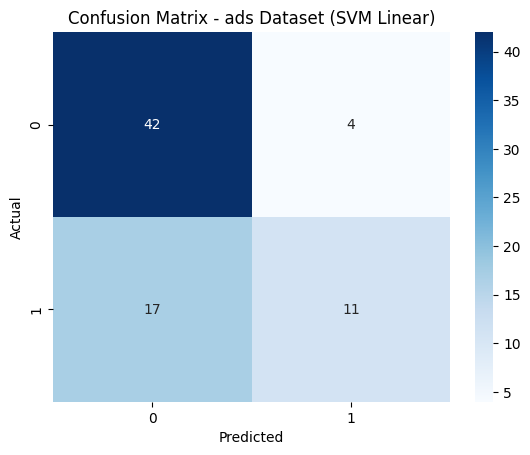

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ads Dataset (SVM Linear)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

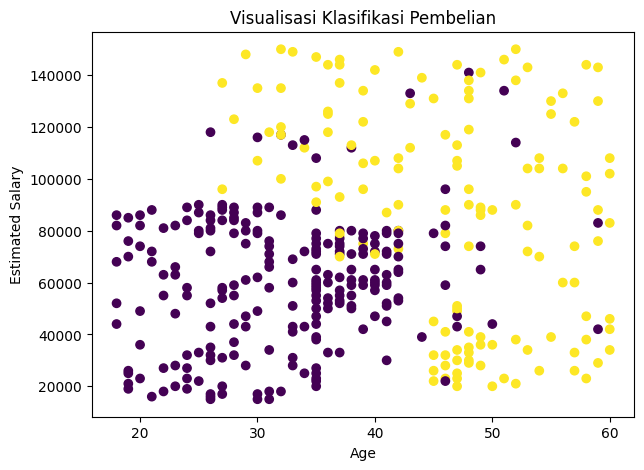

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='viridis')
plt.title('Visualisasi Klasifikasi Pembelian')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[
    go.Scatter3d(
        x=df['Age'],
        y=df['EstimatedSalary'],
        z=df['Purchased'],
        mode='markers',
        marker=dict(
            size=5,
            color=df['Purchased'],  # Color points based on 'Purchased'
            colorscale='Viridis',
            opacity=0.8
        )
    )
])

fig.update_layout(
    title='3D Scatter Plot of Age, Estimated Salary, and Purchased',
    scene = dict(
        xaxis_title='Age',
        yaxis_title='Estimated Salary',
        zaxis_title='Purchased'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()